In [49]:
import re
import pandas as pd
import datetime
import mysql.connector
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [41]:
conexao = mysql.connector.connect(host='localhost',user='root',password='',database='producao')
cursor = conexao.cursor()

Tempo médio concessão-depósito: [1] 2007 = 10.30
Tempo médio concessão-data_nacional: 2007 = 9.23
Tempo médio concessão-pedexame: 2007 = 2.57
Tempo médio concessão-depósito: [7] 2008 = 11.85
Tempo médio concessão-data_nacional: 2008 = 5.46
Tempo médio concessão-pedexame: 2008 = 1.86
Tempo médio concessão-depósito: [1] 2009 = 13.92
Tempo médio concessão-data_nacional: 2009 = 12.41
Tempo médio concessão-pedexame: 2009 = 4.62
Tempo médio concessão-depósito: [4] 2010 = 11.06
Tempo médio concessão-data_nacional: 2010 = 5.38
Tempo médio concessão-pedexame: 2010 = 3.58
Tempo médio concessão-depósito: [4] 2011 = 11.62
Tempo médio concessão-data_nacional: 2011 = 6.13
Tempo médio concessão-pedexame: 2011 = 3.87
Tempo médio concessão-depósito: [19] 2012 = 11.87
Tempo médio concessão-data_nacional: 2012 = 7.83
Tempo médio concessão-pedexame: 2012 = 6.32
Tempo médio concessão-depósito: [75] 2013 = 10.77
Tempo médio concessão-data_nacional: 2013 = 8.68
Tempo médio concessão-pedexame: 2013 = 7.27
Tem

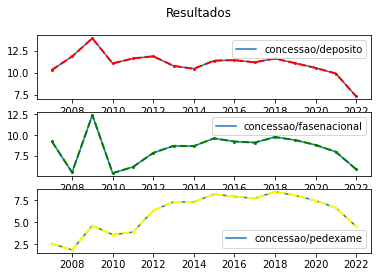

In [3]:
def numOfDays(date1, date2):
    return (date2-date1).days

y = []
x = []
z = []
w = []
#confere média de tempo de registro
for ano in range(2002, 2023, 1):
    soma1 = 0
    soma2 = 0
    soma3 = 0
    total = 0
    comando = f'select * from arqpatentes where year(concessao)={ano} and data_deposito is not null and data_nacional is not null and pedexame is not null'
    cursor.execute(comando)
    resultado = cursor.fetchall()
    for row in resultado:
        #print("numero= "+str(row[0]))
        #print("data deposito= "+str(row[1]))
        if row[1] is not None:
            d=datetime.datetime.strptime(str(row[1]), "%Y-%m-%d")
            date1 = datetime.date(d.year, d.month, d.day)
        #print("data nacional= "+str(row[2]))
        if row[2] is not None:
            d=datetime.datetime.strptime(str(row[2]), "%Y-%m-%d")
            date2 = datetime.date(d.year, d.month, d.day)       
        #print("data concessao= "+str(row[4]))
        if row[4] is not None:
            d=datetime.datetime.strptime(str(row[4]), "%Y-%m-%d")
            date4 = datetime.date(d.year, d.month, d.day)
        #print("data pedexame= "+str(row[3]))
        if row[3] is not None:
            d=datetime.datetime.strptime(str(row[3]), "%Y-%m-%d")
            date3 = datetime.date(d.year, d.month, d.day)
        #print(numOfDays(date1, date5)/365, "anos")
        soma1 = soma1 + numOfDays(date1, date4)
        soma2 = soma2 + numOfDays(date2, date4)
        soma3 = soma3 + numOfDays(date3, date4)
        total = total + 1
        #print("\n")
    
    if total>0:
        media1 = soma1/total/365
        y.append(media1)
        media2 = soma2/total/365
        z.append(media2)
        media3 = soma3/total/365
        w.append(media3)
        x.append(ano)
        print(f'Tempo médio concessão-depósito: [{total}] {ano} = {media1:.2f}')
        print(f'Tempo médio concessão-data_nacional: {ano} = {media2:.2f}')
        print(f'Tempo médio concessão-pedexame: {ano} = {media3:.2f}')

fig, aux = plt.subplots(3)
fig.suptitle('Resultados')
aux[0].plot(x,y,label="concessao/deposito")
aux[0].legend()
aux[0].plot(x,y,color='red' , marker='o', markersize=2, linestyle='dashed', linewidth=2)

aux[1].plot(x,z,label="concessao/fasenacional")
aux[1].legend()
aux[1].plot(x,z,color='green' , marker='o', markersize=2, linestyle='dashed', linewidth=2)

aux[2].plot(x,w,label="concessao/pedexame")
aux[2].legend()
aux[2].plot(x,w,color='yellow' , marker='o', markersize=2, linestyle='dashed', linewidth=2)

plt.show()


In [69]:
y = []
x = []
z = []
w = []
meses = np.array(['','jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez'])

#confere média de tempo de registro
for ano in range(2019, 2023, 1):
    for mes in range(1, 13, 1):
        soma_deposito = 0
        soma_pedexame = 0
        soma_nacional = 0
        total_deposito = 0
        total_pedexame = 0
        total_nacional = 0
        total = 0
        comando = f'select * from arquivadosxml where year(data)={ano} and month(data)={mes} and despacho="16.1" and anulado=0'
        cursor.execute(comando)
        resultado = cursor.fetchall()
        for row in resultado:
            numero = str(row[2])
            d=datetime.datetime.strptime(str(row[3]), "%Y-%m-%d")
            d_concessao = datetime.date(d.year, d.month, d.day)

            try:
                d_deposito = None
                d_nacional = None
                d_pedexame = None

                if numero=='212012000255' or numero=='112012000255' or numero=='202012000255':
                    numero=='212012000255'

                numero1 = numero
                numero2 = numero
                comando = f"select * from pimupi where numero1='{numero}' or numero2='{numero}'"
                cursor.execute(comando)
                resultado2 = cursor.fetchall()
                for row in resultado2:
                    numero1 = row[0]
                    numero2 = row[1]

                comando1 = f"select * from arqpatentes where numero='{numero1}' or numero='{numero2}'"
                cursor.execute(comando1)
                resultado = cursor.fetchone()
                if resultado is not None:
                    d = resultado[1]
                    if d is not None:
                        data_deposito = str(d.year) + '-' + str(d.month) + '-' + str(d.day)
                        d_deposito = datetime.date(d.year, d.month, d.day)
                    d = resultado[2]
                    if d is not None:
                        data_nacional = str(d.year) + '-' + str(d.month) + '-' + str(d.day)
                        d_nacional = datetime.date(d.year, d.month, d.day)
                    d = resultado[3]
                    if d is not None:
                        pedexame = str(d.year) + '-' + str(d.month) + '-' + str(d.day)
                        d_pedexame = datetime.date(d.year, d.month, d.day)

                    #print(data_deposito)
            except (mysql.connector.Error, mysql.connector.Warning) as e:
                print(e)
                print(str(numero))

            if d_deposito is not None:
                soma_deposito = soma_deposito + numOfDays(d_deposito, d_concessao)
                total_deposito = total_deposito + 1
            if d_pedexame is not None:
                soma_pedexame = soma_pedexame + numOfDays(d_pedexame, d_concessao)
                total_pedexame = total_pedexame + 1
            if d_nacional is not None:
                soma_nacional = soma_nacional + numOfDays(d_nacional, d_concessao)
                total_nacional = total_nacional + 1

            total = total + 1
            if  d_deposito is None and d_pedexame is None and d_nacional is None:
                print(comando1)

        media_deposito=0
        media_pedexame=0
        media_nacional=0
        if total_deposito>0:
            media_deposito = soma_deposito/total_deposito/365
        if total_pedexame>0:
            media_pedexame = soma_pedexame/total_pedexame/365
        if total_nacional>0:
            media_nacional = soma_nacional/total_nacional/365

        y.append(media_deposito)
        z.append(media_pedexame)
        w.append(media_nacional)
        i = (ano-2019)*12 + mes
        x.append(i)
        diferenca1 = media_pedexame - media_deposito
        diferenca2 = media_nacional - media_deposito
        jmes = meses[mes]
        print(f'{jmes} de {ano}')
        print(f'Total registros: {total_deposito} {total_pedexame} {total_nacional}')
        print(f'Tempo médio para concessão-deposito: {media_deposito:.2f}')
        print(f'Tempo médio para concessão-pedexame: {media_pedexame:.2f} [{diferenca1:.2f}]')
        print(f'Tempo médio para concessão-fase nacional: {media_nacional:.2f} [{diferenca2:.2f}]')
        print()

x1 = x.copy()
z1 = z.copy()
anoi = ano + 1
for ano in range(anoi, anoi+4, 1):
    for mes in range(1, 13, 1):
        i = (ano-2019)*12 + mes
        x1.append(i)
        z1.append(0)

x1_array = np.array(x1)
x1_array = x1_array.reshape(-1,1)
z1_array = np.array(z1)

x_array = np.array(x)
x_array = x_array.reshape(-1,1)
z_array = np.array(z)
regressor = LinearRegression()
regressor.fit(x_array, z_array)
previsoes = regressor.predict(x_array)
previsoes1 = regressor.predict(x1_array)

grafico = px.scatter(x = x1_array.ravel(), y = z1_array)
grafico.add_scatter(x = x1_array.ravel(), y = previsoes1, name = 'Regressão')
grafico.show()

#fig, aux = plt.subplots(3)
#fig.suptitle('Resultados')
#aux[0].plot(x,y,label="concessao/deposito")
#aux[0].legend()
#aux[0].plot(x,y,color='red' , marker='o', markersize=2, linestyle='dashed', linewidth=2)

#aux[1].plot(x,z,label="concessao/fasenacional")
#aux[1].legend()
#aux[1].plot(x,z,color='green' , marker='o', markersize=2, linestyle='dashed', linewidth=2)

#aux[2].plot(x,w,label="concessao/pedexame")
#aux[2].legend()
#aux[2].plot(x,w,color='yellow' , marker='o', markersize=2, linestyle='dashed', linewidth=2)

#plt.show()


jan de 2019
Total registros: 883 877 883
Tempo médio para concessão-deposito: 10.17
Tempo médio para concessão-pedexame: 5.69 [-4.47]
Tempo médio para concessão-fase nacional: 8.85 [-1.32]

fev de 2019
Total registros: 839 833 839
Tempo médio para concessão-deposito: 9.98
Tempo médio para concessão-pedexame: 5.40 [-4.57]
Tempo médio para concessão-fase nacional: 8.68 [-1.30]

mar de 2019
Total registros: 708 704 708
Tempo médio para concessão-deposito: 9.90
Tempo médio para concessão-pedexame: 5.11 [-4.78]
Tempo médio para concessão-fase nacional: 8.31 [-1.58]

abr de 2019
Total registros: 1477 1463 1477
Tempo médio para concessão-deposito: 10.08
Tempo médio para concessão-pedexame: 5.36 [-4.72]
Tempo médio para concessão-fase nacional: 8.64 [-1.44]

mai de 2019
Total registros: 1069 1064 1069
Tempo médio para concessão-deposito: 10.09
Tempo médio para concessão-pedexame: 5.55 [-4.53]
Tempo médio para concessão-fase nacional: 8.78 [-1.31]

jun de 2019
Total registros: 812 810 812
Tempo

ago de 2022
Total registros: 2379 2376 2377
Tempo médio para concessão-deposito: 6.96
Tempo médio para concessão-pedexame: 4.19 [-2.77]
Tempo médio para concessão-fase nacional: 5.49 [-1.47]

set de 2022
Total registros: 1902 1902 1902
Tempo médio para concessão-deposito: 7.29
Tempo médio para concessão-pedexame: 4.54 [-2.76]
Tempo médio para concessão-fase nacional: 5.86 [-1.43]

out de 2022
Total registros: 1700 1700 1700
Tempo médio para concessão-deposito: 6.77
Tempo médio para concessão-pedexame: 4.07 [-2.70]
Tempo médio para concessão-fase nacional: 5.39 [-1.38]

nov de 2022
Total registros: 2253 2253 2253
Tempo médio para concessão-deposito: 6.67
Tempo médio para concessão-pedexame: 3.92 [-2.75]
Tempo médio para concessão-fase nacional: 5.26 [-1.40]

dez de 2022
Total registros: 1650 1191 1472
Tempo médio para concessão-deposito: 6.59
Tempo médio para concessão-pedexame: 4.42 [-2.17]
Tempo médio para concessão-fase nacional: 5.46 [-1.13]



In [64]:
total = 0
comando = f'select * from arquivadosxml where despacho="16.1" and anulado=0 and year(data)>=2018'
cursor.execute(comando)
resultado = cursor.fetchall()
for row in resultado:
    numero = str(row[2])
    try:
        numero1 = numero
        numero2 = numero
        comando = f"select * from pimupi where numero1='{numero}' or numero2='{numero}'"
        cursor.execute(comando)
        resultado2 = cursor.fetchall()
        for row in resultado2:
            numero1 = row[0]
            numero2 = row[1]

        comando = f"select * from arqpatentes where numero='{numero1}' or numero='{numero2}'"
        cursor.execute(comando)
        resultado2 = cursor.fetchone()
        if resultado2 is None:
            comando = f"select * from publicados where numero='{numero1}' or numero='{numero2}'"
            cursor.execute(comando)
            resultado2 = cursor.fetchall()
            for row in resultado2:  
                depositante = str(row[2])
                depositante = depositante.replace("'", "\\'").strip()
                data_deposito = str(row[4])
                pedexame = str(row[3])
                dataout = str(row[7])
                despacho_out = str(row[8])
                data_nacional = str(row[9])
                comando = f"INSERT INTO arqpatentes (numero, data_deposito, data_nacional, pedexame, concessao, anuidade, extincao, dataout, despacho_out, depositante) VALUES ('{numero}', '{data_deposito}', '{data_nacional}', '{pedexame}', null, null, null, '{dataout}', '{despacho_out}','{depositante}')"
                cursor.execute(comando)
                conexao.commit()
                print(comando+";")
                total = total + 1
            
    except (mysql.connector.Error, mysql.connector.Warning) as e:
        print(e)
        print(str(numero))
        
print(f"Fim de processamento: {total}")

INSERT INTO arqpatentes (numero, data_deposito, data_nacional, pedexame, concessao, anuidade, extincao, dataout, despacho_out, depositante) VALUES ('202021009493', '2021-05-14', 'None', '2022-01-11', null, null, null, 'None', '','GUSTAVO FERNANDES GODOY ALMEIDA (BR/PE)');
INSERT INTO arqpatentes (numero, data_deposito, data_nacional, pedexame, concessao, anuidade, extincao, dataout, despacho_out, depositante) VALUES ('212016000904', '2013-11-08', '2016-01-15', '2017-07-25', null, null, null, 'None', '','YOSHIHIRO AZUMA (JP)');
INSERT INTO arqpatentes (numero, data_deposito, data_nacional, pedexame, concessao, anuidade, extincao, dataout, despacho_out, depositante) VALUES ('MU9003076', '2010-09-17', '2010-09-17', '2011-10-11', null, null, null, 'None', '','Pulsfog Pulverizadores Ltda (BR/SP)');
Fim de processamento: 3
